## Import Libraries and load Data

In [401]:
import pandas as pd
from sklearn import cluster
import seaborn as sns

In [402]:
df = pd.read_csv("marketing_campaign.csv", sep = '\t')

## Data Cleaning

### drop missing values

In [403]:
df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### convert all columns to lowercase

In [404]:
df.columns= df.columns.str.lower()

### drop unnecessary columns

In [405]:
#drop "ID","Z_CostContact" and "Z_Revenue" column
df = df.drop(columns=["id", "z_costcontact","z_revenue" ])

### create new column "age"

In [406]:
df["age"] = 2022 - df["year_birth"]

In [407]:
df["age"]

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: age, Length: 2240, dtype: int64

In [408]:
#drop "year_birth"
df = df.drop(columns=["year_birth"])

### remove outliers in "age" column

In [409]:
max(df["age"])

129

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

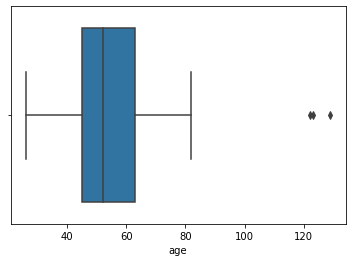

In [410]:
sns.boxplot(df["age"])

In [411]:
df.loc[df['age'] == 129]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
239,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,...,2,4,0,0,0,0,0,0,0,129


In [412]:
df.drop([239], axis=0, inplace=True)

In [413]:
max(df["age"])

123

In [414]:
df.loc[df['age'] == 123]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
339,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,...,4,1,0,0,1,0,0,0,0,123


In [415]:
df.drop([339], axis=0, inplace=True)

In [416]:
max(df["age"])

122

In [417]:
df.loc[df['age'] == 122]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
192,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,...,2,5,0,0,0,0,0,1,0,122


In [418]:
df.drop([192], axis=0, inplace=True)

In [419]:
max(df["age"])

82

### clean education column

In [420]:
df["education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [421]:
def clean_edu(x):
    if x in ['Basic', '2n Cycle']:
        return "Undergraduate"
    elif x in ['Graduation']:
        return "Graduate"
    elif x in ['Master', 'PhD']:
        return "Postgraduate"

In [422]:
df['education'] = list(map(clean_edu, df['education']))

### convert income to int

In [423]:
df["income"] = df["income"].astype("Int64")

### clean "marital_status"

In [424]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [425]:
df.loc[df['marital_status'] == "YOLO"]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
2177,Postgraduate,YOLO,48432,0,1,18-10-2012,3,322,3,50,...,6,8,0,0,0,0,0,0,0,49
2202,Postgraduate,YOLO,48432,0,1,18-10-2012,3,322,3,50,...,6,8,0,0,0,0,0,0,1,49


In [426]:
#remove "YOLO" from "marital_status"
df = df.drop([2177, 2202])

In [427]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd'], dtype=object)

In [428]:
def clean_marital(x):
    if x in ['Together', 'Married']:
        return "together"
    elif x in ["Single", "Alone", "Widow", "Divorced", 'Absurd']:
        return "single"

In [429]:
df['marital_status'] = list(map(clean_marital, df['marital_status']))

### new column "children"

In [430]:
#concat "kidhome" and "teenhome" and create new column "children"
df["children"]= df["kidhome"] + df["teenhome"]

In [431]:
#drop "kidhome", "teenhome" columns
df = df.drop(columns=["kidhome","teenhome"])

### concatenate campaigns 

In [433]:
df["acc_camp"] = df["acceptedcmp1"] + df["acceptedcmp2"] + df["acceptedcmp3"] + df["acceptedcmp4"] + df["acceptedcmp5"]

In [434]:
df["acc_camp"].value_counts()

0    1773
1     324
2      83
3      44
4      11
Name: acc_camp, dtype: int64

In [435]:
df = df.drop(columns=["acceptedcmp1", "acceptedcmp2","acceptedcmp3", "acceptedcmp4", "acceptedcmp5" ])

In [436]:
df

,education,marital_status,income,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,children,acc_camp
0,Graduate,single,58138,04-09-2012,58,635,88,546,172,88,...,3,8,10,4,7,0,1,65,0,0
1,Graduate,single,46344,08-03-2014,38,11,1,6,2,1,...,2,1,1,2,5,0,0,68,2,0
2,Graduate,together,71613,21-08-2013,26,426,49,127,111,21,...,1,8,2,10,4,0,0,57,0,0
3,Graduate,together,26646,10-02-2014,26,11,4,20,10,3,...,2,2,0,4,6,0,0,38,1,0
4,Postgraduate,together,58293,19-01-2014,94,173,43,118,46,27,...,5,5,3,6,5,0,0,41,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,together,61223,13-06-2013,46,709,43,182,42,118,...,2,9,3,4,5,0,0,55,1,0
2236,Postgraduate,together,64014,10-06-2014,56,406,0,30,0,0,...,7,8,2,5,7,0,0,76,3,1
2237,Graduate,single,56981,25-01-2014,91,908,48,217,32,12,...,1,2,3,13,6,0,0,41,0,1
2238,Postgraduate,together,69245,24-01-2014,8,428,30,214,80,30,...,2,6,5,10,3,0,0,66,1,0
